# Taller 1
Universidad Externado de Colombia 

Finanzas Computacionales 

*   Maria Fernanda Díaz Velásquez
*   Juan Pablo Pinzón González



## Punto 1.
Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos  acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando  pandas datareader. Con esta información:  
 
> **a.** Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los  resultados en una tabla.

> **b.** Calcule los retornos esperados y volatilidades anualizadas.

> **c.** Construya una tabla resumen con las estadísticas descriptivas de las series diarias  (media, mediana, desv. estándar, curtosis, simetría) de los dos activos.

> **d.** Compare las distribuciones empíricas de los dos activos con la distribución teórica  normal. 

> **e.** Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman. f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos.





In [ ]:
!pip install --quiet yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.7 MB/s eta 0:00:00


In [ ]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
#Se utilizan las acciones de Visa y Airbnb
assets = ['V','ABNB'] 
start = '2021-01-01'
end = '2022-12-31'

In [ ]:
yf.pdr_override()
#Se importan los precios diarios
precios=web.DataReader(assets,start,end,)['Adj Close']
#Se importan los precios mensuales
preciosmen=web.DataReader(assets,start,end,interval='1Mo')['Adj Close']
preciosmen

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,ABNB,V
Date,,
2021-01-01,183.630005,190.255539
2021-02-01,206.350006,209.098953
2021-03-01,187.940002,208.772797
2021-04-01,172.710007,230.297913
2021-05-01,140.399994,224.125320
2021-06-01,153.139999,230.889160
2021-07-01,144.009995,243.301590
2021-08-01,154.990005,226.228333
2021-09-01,167.750000,220.257767


In [ ]:
#Calcule los retornos logarítmicos diarios, mensuales y anualizados. 
r_diario = np.log(precios/precios.shift(1)).dropna()
r_mensual = np.log(preciosmen/preciosmen.shift(1)).dropna()
re_anual=r_mensual*12
r_anual=re_anual.mean()

ABNB   -0.398821
V       0.044900
dtype: float64

In [ ]:
#Presente los resultados en una tabla.
tabla = pd.DataFrame([r_anual,r_diario.mean(),r_mensual.mean()],index={'Retorno Diario','Retorno Anual','Retorno Mensual'})
tabla

,ABNB,V
Retorno Anual,-0.398821,0.044900
Retorno Diario,-0.000970,-0.000066
Retorno Mensual,-0.033235,0.003742


De la tabla anterior podemos inferir que los retornos diarios son menores que los mensuales y los anuales para ambas acciones, mientras que los Anuales son los mayores. De la misma manera, se observa que en el tiempo seleccionados los retornos mensuales, diarios y anuales de la acción de Airbnb son negativos. 

In [ ]:
# Volatilidad y Valor Esperado de los retornos (anualizado)
from scipy.stats.morestats import sqrt

sigma=r_diario.std()*np.sqrt(252)
mu = r_diario.mean()*252

In [ ]:
#Estadística Descriptiva de la Serie Diaria
r_diario.describe()

rdmedia=r_diario.mean()
rdsd=r_diario.std()
rdmediana=r_diario.median()
rdkurtosis=r_diario.kurtosis()
rdasimetria=r_diario.skew()


In [ ]:
#Tabla resumen de Estadíatica Descriptiva
tabla2 = pd.DataFrame([rdmediana,rdasimetria,rdsd,rdkurtosis,rdmedia],index={'Mediana','Desviación Estándar','Kurtosis','Asimetría','Media'})
tabla2

,ABNB,V
Mediana,-0.001157,-0.000130
Asimetría,0.006404,0.180965
Desviación Estándar,0.035853,0.017443
Kurtosis,1.050161,3.235603
Media,-0.000970,-0.000066


Se puede analizar de la tabla anterior que ambas acciones presentan un coheficiente de kurtosis positivo, lo cual significa que hay una mayor concentración de datos entorno a la media, especialmente en la accion de Visa. 

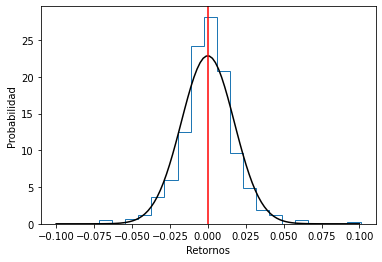

In [ ]:
#Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.
##Visa
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=100)

plt.hist(r_diario['V'],bins=20,density=True,histtype="step")
plt.plot(x,norm.pdf(x,scale=r_diario['V'].std()),'k')
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.axvline(r_diario['V'].mean(),color='r');

La distribición de los retornos de la acción de Visa se distribuye de manera leptocúrtica, ya que los datos estan más concentrados entorno a la media. También, se puede evidenciar que no es una distribución normal, dado a que su media y su mediana no coinciden, la desviación estándar es diferente a 1 y no existe simetria alrededor de la media. 

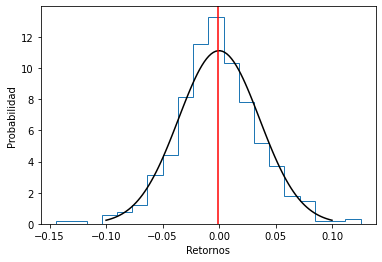

In [ ]:
##Airbnb
plt.hist(r_diario['ABNB'],bins=20,density=True,histtype="step")
plt.plot(x,norm.pdf(x,scale=r_diario['ABNB'].std()),'k')
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.axvline(r_diario['ABNB'].mean(),color='r');

La distribición de los retornos de la acción de Airbnb se distribuye de manera leptocúrtica, ya que los datos estan más concentrados entorno a la media, sin embargo es "achatada" que la primero, puesto que su coeficiente de Kurtosis es menor con respecto a la anterior. También, se puede evidenciar que no es una distribución normal, dado a que su media y su mediana no coinciden, la desviación estándar es diferente a 1 y no existe simetria alrededor de la media. 

In [ ]:
##Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.

#Correlación de Pearson
r_diario.corr()

,ABNB,V
ABNB,1.000000,0.401388
V,0.401388,1.000000


Segun la matriz de correlación de Pearson, los dos activos tienen una correlación positiva débil. Sin embargo, este método si tiene en cuenta los outliers, lo que altera el resultado.

In [ ]:
#Correlación de Kendall
r_diario.corr(method="kendall")

,ABNB,V
ABNB,1.000000,0.260475
V,0.260475,1.000000


Segun la matriz de correlación de Kendall, los dos activos tienen una correlación positiva débil, frente al coeficiente anterior este es más bajo. Sin embargo, este método si tiene en cuenta los outliers, lo que altera el resultado

In [ ]:
#Correlación de Spearman
r_diario.corr(method="spearman")

,ABNB,V
ABNB,1.000000,0.373906
V,0.373906,1.000000


Segun la matriz de correlación de Spearman, los dos activos tienen una correlación positiva débil, frente al coeficiente anterior este es más alto. Este método no tiene en cuenta los outliers y se asume como el mejor método de correlación no lineal cuando no hay normalidad.

## Punto 2.
Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas
acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022. Con esta información:


> **a**. Calcule los retornos y volatilidades anualizadas.



> **b**. Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su
retorno esperado.



In [ ]:
assets = ['PH','PEP','PG','ROL','RE','WM','WELL','XOM','CAT','CBOE']
start = '2017-12-01'
end = '2022-12-31'
yf.pdr_override()
precios2=web.DataReader(assets,start,end,interval="1Mo")['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [ ]:
#Calcule los retornos y volatilidades anualizadas.
r_10 = np.log(precios2/precios2.shift(1)).dropna()
mu =(r_10.mean()*12)
sigma = r_10.std()*np.sqrt(12)
print("Retornos esperado", mu)
print("Volatilidades", sigma) 
tabla3 = pd.DataFrame([mu.sort_values(ascending=False),sigma.sort_values(ascending=False)],index={'Retorno','Volatilidad Anualizada'}) 
tabla3

Retornos esperado CAT     0.108506
CBOE    0.003637
PEP     0.109881
PG      0.127327
PH      0.092483
RE      0.102560
ROL     0.125339
WELL    0.047577
WM      0.136882
XOM     0.107897
dtype: float64
Volatilidades CAT     0.312415
CBOE    0.249442
PEP     0.175520
PG      0.173940
PH      0.342545
RE      0.255394
ROL     0.259537
WELL    0.333125
WM      0.195142
XOM     0.344318
dtype: float64


,WM,PG,ROL,PEP,CAT,XOM,RE,PH,WELL,CBOE
Retorno,0.136882,0.127327,0.125339,0.109881,0.108506,0.107897,0.102560,0.092483,0.047577,0.003637
Volatilidad Anualizada,0.195142,0.173940,0.259537,0.175520,0.312415,0.344318,0.255394,0.342545,0.333125,0.249442


Se puede observar que entre los retornos esperados de las 10 acciones seleccionadas, el mayor es el de Waste Management Inc (WM) y el menor es el de Cboe Global Markets Inc (CBOE)

##Punto 3. 
Descargue la serie mensual de precios del índice estadounidense Rusell para el periodo
Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando
las siguientes medidas:

> **a.** Desviación estándar

> **b.** Parkinson

> **c.** Garman-Klass

> **d.** Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.


In [ ]:
start = '2011-12-01'
end = '2022-12-31'
yf.pdr_override()
precios3=web.DataReader("^RUT",start,end,interval="1Mo")
retornos3=np.log(precios3['Adj Close']/precios3['Adj Close'].shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Desviación estándar
sigma1 = retornos3.std()
sigmaanual=sigma1*np.sqrt(12)

La volatilidad media mensual es de 0.0547 mientras que, la volatilidad anualizada es de 0.1896

In [ ]:
#Parkinson
lnHL = np.log(precios3["High"]/precios3["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5

(sigmaPark_d.mean())*np.sqrt(12)
sigmaPark_d.mean()


0.1767113126308943

La volatilidad de Parkinson mensual es de 0.0510 mientras que, la volatilidad anualizada es de 0.1767


In [ ]:
#Garman-Klass
lnHL = np.log(precios3["High"]/precios3["Low"]).dropna()
lnCO = np.log(precios3["Close"]/precios3["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
(sigmaGK_d.mean())*np.sqrt(12)
(sigmaGK_d.mean())

0.05239855062447297

La volatilidad de Garman-Klass mensual es de 0.0524 mientras que, la volatilidad anualizada es de 0.1815. Cabe mencionar que, este método incorpora los precios 'Open' y 'Close' para mejorar la estimación de la volatilidad, por ende se recomienda utilizar.

In [ ]:
#Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.
retornos=np.log(precios3['Adj Close']/precios3['Adj Close'].shift(1)).dropna()
ewma_pd= retornos.ewm(alpha=0.94).std()

(ewma_pd.mean())*np.sqrt(12)
ewma_pd.mean()


0.15629834639832033

La volatilidad de EWMA mensual es de 0.04512 mientras que, la volatilidad anualizada es de 0.1562. 